In [1]:
import tarfile
import urllib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import pandas as pd

df = pd.read_csv('P15644.csv')
# set display full table
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Data cleaning

#### Housing Cost to Income

In [3]:
# check both mortcost and rentcost are null
len(df[(df['MortCost'].isnull()) & (df['RentCost'].isnull())])
# 98 rows have both mortcost and rentcost as null (Almost half of them bought their houses in full, so the rent and mortgage are both null values)
df['MortCost']  = df['MortCost'].fillna(0)
df['RentCost']  = df['RentCost'].fillna(0)
df['HousingCost'] = df['MortCost'] + df['RentCost'] # 每个月的

In [4]:
# fill missing value with median (133 missing values)
df['Cur_HHIncomeEquiv4_21_Imputed'].fillna(df['Cur_HHIncomeEquiv4_21_Imputed'].median(), inplace=True)

In [5]:
df['Cur_HHIncomeEquiv4_21_Imputed'].describe()

count    2777.000000
mean        2.602089
std         1.138675
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Cur_HHIncomeEquiv4_21_Imputed, dtype: float64

In [6]:
# individual_income (Values ​​are annual)
quintile_group = [14550, 23396, 31383, 41470, 62682]
#quater_group = [(quintile_group[i-1] + quintile_group[i])/2 for i in range(1, 5)]

In [7]:
# get real income with Cur_HHIncomeEquiv4_21_Imputed as indice of quater_group
df['Cur_HHIncomeEquiv4_21_real_value'] = df['Cur_HHIncomeEquiv4_21_Imputed'].apply(lambda x: quintile_group[int(x)-1])

In [8]:
df['HousingCostToIncome'] = (df['HousingCost'] * 12) / df['Cur_HHIncomeEquiv4_21_real_value']

In [9]:
# pick HousingCostToIncome is larger than 4
df_ = df[df['HousingCostToIncome'] > 1]

In [10]:
df_.head(100)

,panelid_2,Panel_PSU,Panel_Strata,Jun21_WeightBoost,Jun21_IntDate,Jun21_IntMode,ff_disact,Cur_GOR,cur_urbrurew,cur_urbrurs,Cur_Sex,Cur_RClassGp,Cur_AgeCat,Cur_HEdQual,Cur_RelStat5,Cur_HHSize5,Cur_HHChild,Cur_HHType,Cur_SubjInc,Cur_HHIncome4_21,Cur_HHIncome4_21_Imputed,Cur_HHIncomeEquiv4_21,Cur_HHIncomeEquiv4_21_Imputed,Cur_IdentClass,Cur_PartyID5,Cur_Ethnic6,Cur_IntUse3,Tenure,MortCost,RentCost,CvBedRoom,HomeProb01,HomeProb02,HomeProb03,HomeProb04,HomeProb05,HomeProb06,HomeProb07,HomeProb08,HomeProb09,HomeProb10,HomeProb11,HomeProb12,HomeProb13,HomeProb14,HomeProb15,HomeProb16,HomeProb17,HomeProb_Oth,NeighQual_CrimeSafety_q,NeighQual_TrafficSafety_q,NeighQual_FoodStores_q,NeighQual_AccessPubTrans_q,NeighQual_AccessSocCult_q,NeighQual_AccessRetail_q,NeighQual_AccessRec_q,NeighQual_EaseWalk_q,NeighQual_EaseCycle_q,NeighQual_OutdoorPlay_q,NeighQual_QualitySchools_q,NeighQual_NeighbourSoc_q,MovHom,EconActPreCov1,EconActPreCov2,EconActPreCov3,EconActPreCov4,EconActPreCov5,WorkTimePreCov,WFHPreCov,CommuteModePreCov,CommuteTimePreCov,FoodShopModePreCov,FoodTimePreCov,EconAct,WorkTime,WFH,CommuteMode,CommuteTime,FoodShopMode,FoodTime,Health,HousingCost,Cur_HHIncomeEquiv4_21_real_value,HousingCostToIncome
26,119064.0,12001155.0,7.0,1.083894,1.384304e+10,Web,3.0,7.0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,4.0,NaN,4.0,5.0,NaN,1.0,NaN,1.0,2.0,2.0,4.0,2.0,10.0,0.0,1300.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,3.0,30.0,5.0,NaN,NaN,NaN,NaN,3.0,35.0,3.0,1300.0,14550,1.072165
36,106092.0,12001155.0,7.0,0.678599,1.384304e+10,Web,2.0,7.0,1.0,NaN,2.0,1.0,2.0,1.0,1.0,4.0,1.0,4.0,5.0,NaN,1.0,NaN,1.0,2.0,1.0,4.0,1.0,10.0,0.0,1300.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,4.0,2.0,5.0,3.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,40.0,4.0,1.0,40.0,3.0,30.0,8.0,NaN,NaN,NaN,NaN,3.0,30.0,2.0,1300.0,14550,1.072165
46,108796.0,11900189.0,2.0,1.491923,1.384273e+10,Web,3.0,2.0,1.0,NaN,2.0,1.0,3.0,4.0,1.0,5.0,1.0,4.0,5.0,2.0,2.0,1.0,1.0,3.0,5.0,4.0,2.0,10.0,0.0,1800.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,9.0,25.0,3.0,6.0,5.0,9.0,70.0,9.0,20.0,4.0,1800.0,14550,1.484536
54,110137.0,11801940.0,6.0,2.608649,1.384280e+10,Web,3.0,6.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0,3.0,1.0,4.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,5.0,2.0,10.0,0.0,3250.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,48.0,5.0,9.0,5.0,6.0,20.0,3.0,48.0,3.0,9.0,5.0,6.0,20.0,1.0,3250.0,23396,1.666952
67,111665.0,11800457.0,5.0,0.811049,1.384271e+10,Web,3.0,5.0,2.0,NaN,1.0,8.0,2.0,4.0,1.0,5.0,1.0,4.0,3.0,2.0,2.0,1.0,1.0,1.0,5.0,1.0,1.0,10.0,0.0,1600.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,3.0,2.0,4.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,6.0,10.0,6.0,20.0,8.0,NaN,NaN,NaN,NaN,6.0,20.0,4.0,1600.0,14550,1.319588
70,107741.0,11801160.0,8.0,0.287320,1.384305e+10,Web,3.0,8.0,1.0,NaN,1.0,1.0,3.0,1.0,3.0,3.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,1.0,10.0,0.0,2000.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,4.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,6.0,20.0,8.0,NaN,NaN,NaN,NaN,6.0,20.0,1.0,2000.0,14550,1.649485
72,106689.0,11900849.0,7.0,0.464966,1.384274e+10,Web,1.0,7.0,1.0,NaN,1.0,1.0,3.0,1.0,1.0,4.0,1.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,5.0,2.0,1.0,10.0,0.0,1600.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,2.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,6.0,17.0,8.0,NaN,NaN,NaN,NaN,6.0,20.0,2.0,1600.0,14550,1.319588
100,117030.0,11800982.0,7.0,0.319688,1.384272e+10,Web,3.0,7.0,1.0,NaN,1.0,1.0,3.0,1.0,1.0,5.0,1.0,6.0,2.0,4.0,4

#### Home Problem

In [11]:
# define 'HomeProbTotal' as the sum of 'HomeProb01' to 'HomeProb14'
df['HomeProbTotal'] = df.loc[:, 'HomeProb01':'HomeProb14'].sum(axis=1)

#### Neighbor Quality

In [12]:
print(df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].isnull().sum())

NeighQual_CrimeSafety_q        6
NeighQual_TrafficSafety_q      4
NeighQual_FoodStores_q         2
NeighQual_AccessPubTrans_q     8
NeighQual_AccessSocCult_q      4
NeighQual_AccessRetail_q       5
NeighQual_AccessRec_q          4
NeighQual_EaseWalk_q           4
NeighQual_EaseCycle_q         34
NeighQual_OutdoorPlay_q        9
NeighQual_QualitySchools_q    62
NeighQual_NeighbourSoc_q       1
dtype: int64


In [13]:

# define 'NeighQualTotal' as the sum of 'NeighQual_CrimeSafety_q' to 'NeighQual_NeighbourSoc_q'
# fill missing values with the median for NeighQual columns
df[['NeighQual_CrimeSafety_q', 'NeighQual_TrafficSafety_q', 'NeighQual_FoodStores_q',
       'NeighQual_AccessPubTrans_q', 'NeighQual_AccessSocCult_q',
       'NeighQual_AccessRetail_q', 'NeighQual_AccessRec_q',
       'NeighQual_EaseWalk_q', 'NeighQual_EaseCycle_q',
       'NeighQual_OutdoorPlay_q', 'NeighQual_QualitySchools_q',
       'NeighQual_NeighbourSoc_q']].fillna(df[['NeighQual_CrimeSafety_q', 'NeighQual_TrafficSafety_q', 'NeighQual_FoodStores_q',
       'NeighQual_AccessPubTrans_q', 'NeighQual_AccessSocCult_q',
       'NeighQual_AccessRetail_q', 'NeighQual_AccessRec_q',
       'NeighQual_EaseWalk_q', 'NeighQual_EaseCycle_q',
       'NeighQual_OutdoorPlay_q', 'NeighQual_QualitySchools_q',
       'NeighQual_NeighbourSoc_q']].median(), inplace=True)   

df['NeighQualTotal'] = df.loc[:, 'NeighQual_CrimeSafety_q':'NeighQual_NeighbourSoc_q'].sum(axis=1)

/tmp/ipykernel_6351/164962544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  'NeighQual_NeighbourSoc_q']].fillna(df[['NeighQual_CrimeSafety_q', 'NeighQual_TrafficSafety_q', 'NeighQual_FoodStores_q',


#### Transport Time

In [14]:
# set transport time as the average of commute time and food time if one of them is missing
df['TransportTime'] = df[['CommuteTimePreCov', 'FoodTimePreCov']].mean(axis=1)


In [15]:
# fill miss values with the median for TransportTime
df['TransportTime'].fillna(df['TransportTime'].median(), inplace=True)

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

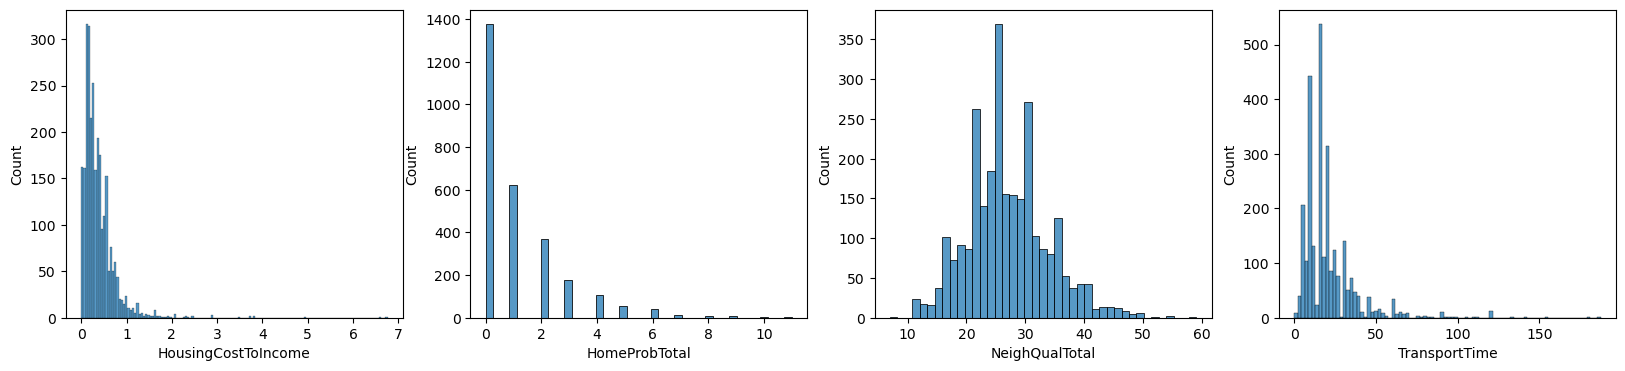

In [16]:
# plot for 'HousingCostToIncome'、'HomeProbTotal' 、 'NeighQualTotal' 、'TransportTime'
# plot in one figure 
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(df['HousingCostToIncome'], ax=axes[0])
sns.histplot(df['HomeProbTotal'], ax=axes[1])
sns.histplot(df['NeighQualTotal'], ax=axes[2])
sns.histplot(df['TransportTime'], ax=axes[3])

plt.show()


## 2. Variable transformation 

#### Housing Cost to Income

In [17]:
df['HousingCostToIncomeGroup'] = pd.cut(df['HousingCostToIncome'], bins=[-1, 0.3, 0.4, 0.5, 10], labels=[0,1,2,3])
df['HousingCostToIncomeGroup'] = df['HousingCostToIncomeGroup'].astype(float)
print(df['HousingCostToIncomeGroup'].value_counts())

HousingCostToIncomeGroup
0.0    1433
3.0     676
1.0     343
2.0     325
Name: count, dtype: int64


#### HomeProbTotal

In [18]:
# Calculate the counts & percentage of each unique value in 'HomeProbTotal'
home_prob_total_counts = df['HomeProbTotal'].value_counts()
home_prob_total_percentage = df['HomeProbTotal'].value_counts(normalize=True) * 100

home_prob_total_summary = pd.DataFrame({
    'Count': home_prob_total_counts,
    'Percentage': home_prob_total_percentage
})

print(home_prob_total_summary)

               Count  Percentage
HomeProbTotal                   
0.0             1375   49.513864
1.0              621   22.362261
2.0              367   13.215700
3.0              179    6.445805
4.0              106    3.817069
5.0               54    1.944544
6.0               40    1.440403
7.0               15    0.540151
8.0                9    0.324091
9.0                7    0.252071
10.0               2    0.072020
11.0               2    0.072020


In [19]:
# 按HomeProbTotal为0,1-2,3-5,大于6进行分组
df['HomeProbTotalGroup'] = pd.cut(df['HomeProbTotal'], bins=[-1, 0, 2, 5, 100], labels=[0, 1, 2, 3])
df['HomeProbTotalGroup'] = df['HomeProbTotalGroup'].astype(float)
print(df['HomeProbTotalGroup'].value_counts())

HomeProbTotalGroup
0.0    1375
1.0     988
2.0     339
3.0      75
Name: count, dtype: int64


#### NeighQualTotal

In [20]:
# Calculate the counts & percentage of each unique value in 'NeighQualTotalTotal'
neigh_quali_total_counts = df['NeighQualTotal'].value_counts()
neigh_quali_total_percentage = df['NeighQualTotal'].value_counts(normalize=True) * 100

neigh_quali_total_summary = pd.DataFrame({
    'Count': neigh_quali_total_counts,
    'Percentage': neigh_quali_total_percentage
})

neigh_quali_total_summary = neigh_quali_total_summary.sort_index()
print(neigh_quali_total_summary)

                Count  Percentage
NeighQualTotal                   
7.0                 1    0.036010
11.0                2    0.072020
12.0               21    0.756212
13.0               17    0.612171
14.0               16    0.576161
15.0               38    1.368383
16.0               42    1.512423
17.0               59    2.124595
18.0               73    2.628736
19.0               91    3.276918
20.0               86    3.096867
21.0              127    4.573281
22.0              135    4.861361
23.0              141    5.077422
24.0              184    6.625855
25.0              195    7.021966
26.0              174    6.265754
27.0              156    5.617573
28.0              154    5.545553
29.0              149    5.365502
30.0              135    4.861361
31.0              136    4.897371
32.0              103    3.709039
33.0               87    3.132877
34.0               80    2.880807
35.0               59    2.124595
36.0               67    2.412676
37.0          

In [21]:
df['NeighQualTotalGroup'] = pd.cut(df['NeighQualTotal'], bins=[-1,20,30,40,100], labels=[0,1,2,3])
df['NeighQualTotalGroup'] = df['NeighQualTotalGroup'].astype(float)
print(df['NeighQualTotalGroup'].value_counts())

NeighQualTotalGroup
1.0    1550
2.0     689
0.0     446
3.0      92
Name: count, dtype: int64


#### Transport Time

In [22]:
# df['TransportTimeGroup'] = pd.cut(df['TransportTime'], bins=[-1, 10, 20, 30, 40, 500], labels=[0,1,2,3,4])
# df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
# print(df['TransportTimeGroup'].value_counts())
df['TransportTimeGroup'] = pd.cut(df['TransportTime'], bins=[-1, 30, 40, 50, 500], labels=[0,1,2,3])
df['TransportTimeGroup'] = df['TransportTimeGroup'].astype(float)
print(df['TransportTimeGroup'].value_counts())

TransportTimeGroup
0.0    2343
1.0     216
3.0     145
2.0      73
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

<Axes: xlabel='TransportTimeGroup', ylabel='Count'>

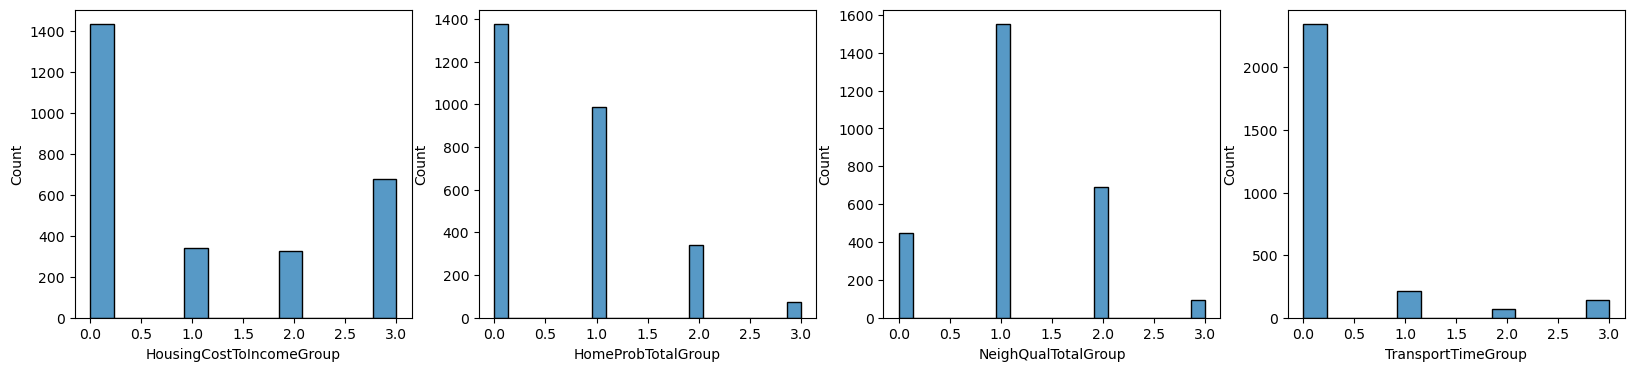

In [23]:
# plot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.histplot(df['HousingCostToIncomeGroup'], ax=axes[0])
sns.histplot(df['HomeProbTotalGroup'], ax=axes[1])
sns.histplot(df['NeighQualTotalGroup'], ax=axes[2])
sns.histplot(df['TransportTimeGroup'], ax=axes[3])


## 3.Descriptive statistics

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

<Axes: xlabel='TransportTimeGroup', ylabel='Health'>

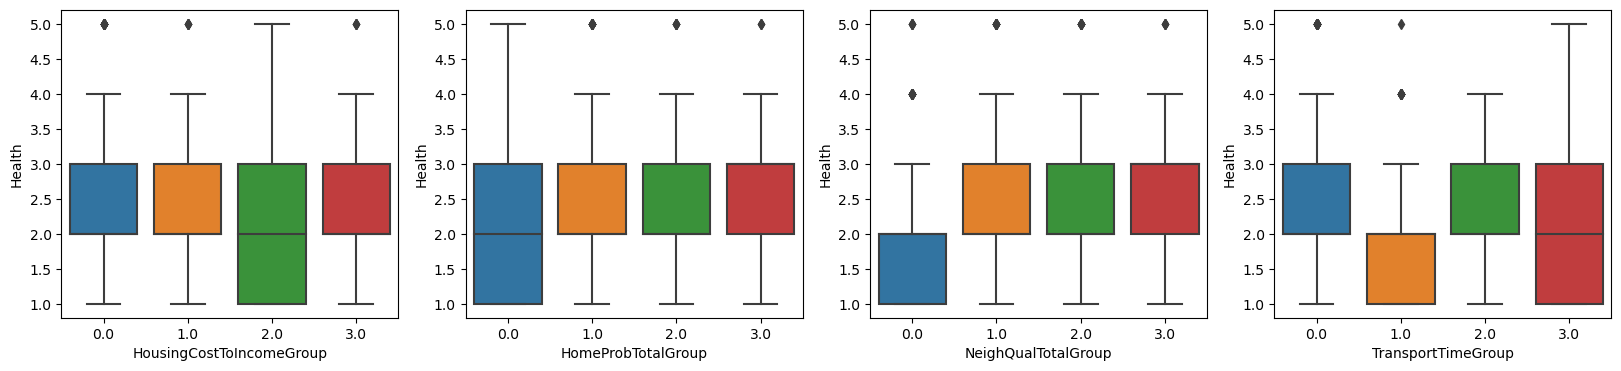

In [24]:
# plot boxplot for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup'
# plot in one figure
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
sns.boxplot(x='HousingCostToIncomeGroup', y='Health', data=df, ax=axes[0])
sns.boxplot(x='HomeProbTotalGroup', y='Health', data=df, ax=axes[1])
sns.boxplot(x='NeighQualTotalGroup', y='Health', data=df, ax=axes[2])
sns.boxplot(x='TransportTimeGroup', y='Health', data=df, ax=axes[3])

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

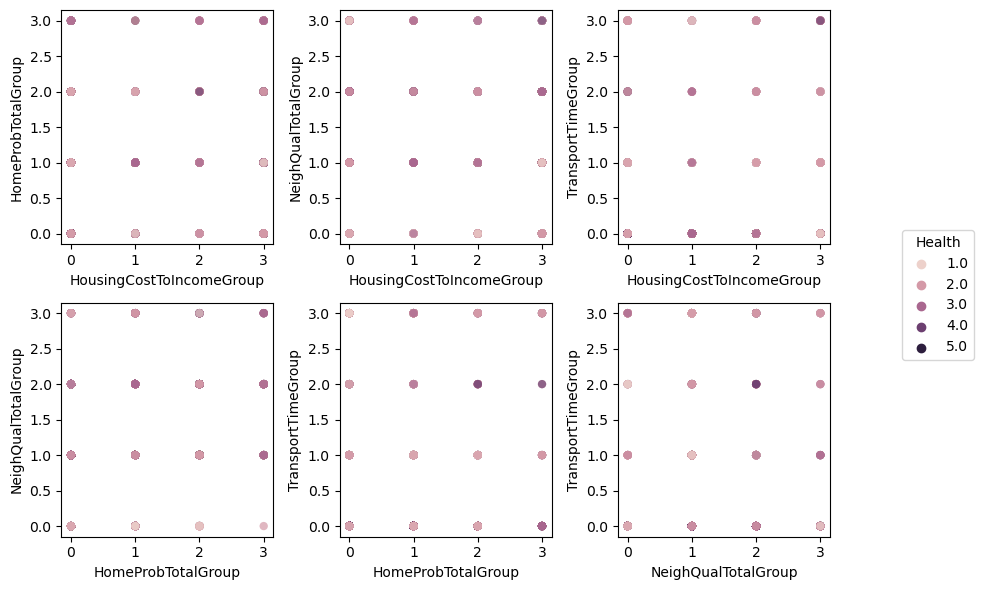

In [25]:
# plot scatter plots for 'HousingCostToIncomeGroup'、'HomeProbTotalGroup' 、 'NeighQualTotalGroup' 、'TransportTimeGroup' pairwise against 'Health'
# Health show as different color
# plot in one figure with larger interval

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

sns.scatterplot(x='HousingCostToIncomeGroup', y='HomeProbTotalGroup', hue='Health', data=df, ax=axes[0, 0], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HousingCostToIncomeGroup', y='NeighQualTotalGroup', hue='Health', data=df, ax=axes[0, 1], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HousingCostToIncomeGroup', y='TransportTimeGroup', hue='Health', data=df, ax=axes[0, 2], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HomeProbTotalGroup', y='NeighQualTotalGroup', hue='Health', data=df, ax=axes[1, 0], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HomeProbTotalGroup', y='TransportTimeGroup', hue='Health', data=df, ax=axes[1, 1], alpha=0.7,edgecolor='none')
sns.scatterplot(x='NeighQualTotalGroup', y='TransportTimeGroup', hue='Health', data=df, ax=axes[1, 2], alpha=0.7,edgecolor='none')


handles, labels = axes[0, 0].get_legend_handles_labels()
for ax in axes.flat:
    ax.get_legend().remove()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.9, 0.5), title='Health')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

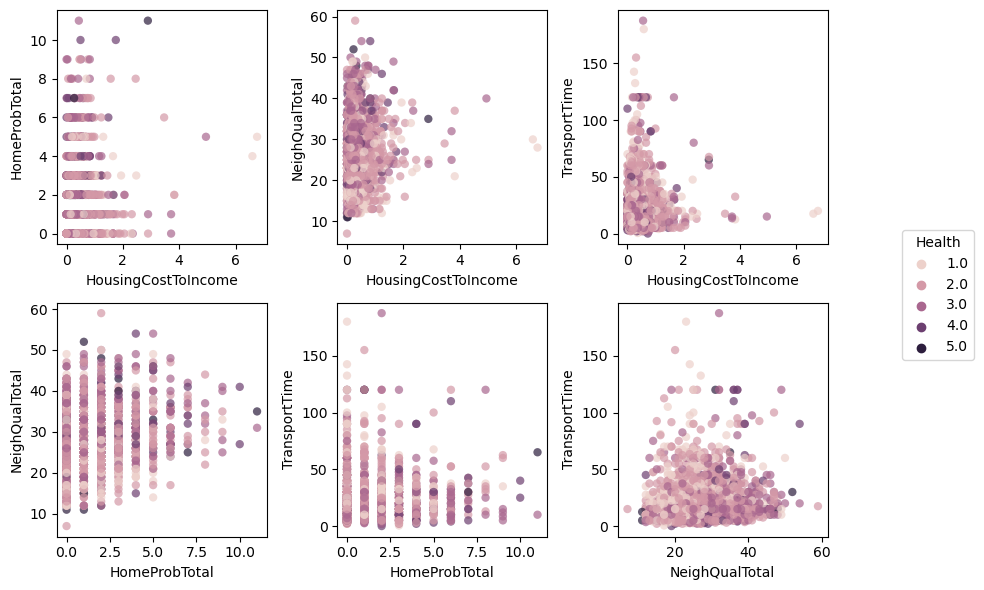

In [26]:
# plot scatter plots for 'HousingCostToIncome'、'HomeProbTotal' 、 'NeighQualTotal' 、'TransportTime' pairwise against 'Health'
# Health show as different color
# plot in one figure with larger interval

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

sns.scatterplot(x='HousingCostToIncome', y='HomeProbTotal', hue='Health', data=df, ax=axes[0, 0], alpha=0.7, edgecolor='none')
sns.scatterplot(x='HousingCostToIncome', y='NeighQualTotal', hue='Health', data=df, ax=axes[0, 1], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HousingCostToIncome', y='TransportTime', hue='Health', data=df, ax=axes[0, 2], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HomeProbTotal', y='NeighQualTotal', hue='Health', data=df, ax=axes[1, 0], alpha=0.7,edgecolor='none')
sns.scatterplot(x='HomeProbTotal', y='TransportTime', hue='Health', data=df, ax=axes[1, 1], alpha=0.7,edgecolor='none')
sns.scatterplot(x='NeighQualTotal', y='TransportTime', hue='Health', data=df, ax=axes[1, 2], alpha=0.7,edgecolor='none')


handles, labels = axes[0, 0].get_legend_handles_labels()
for ax in axes.flat:
    ax.get_legend().remove()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.9, 0.5), title='Health')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


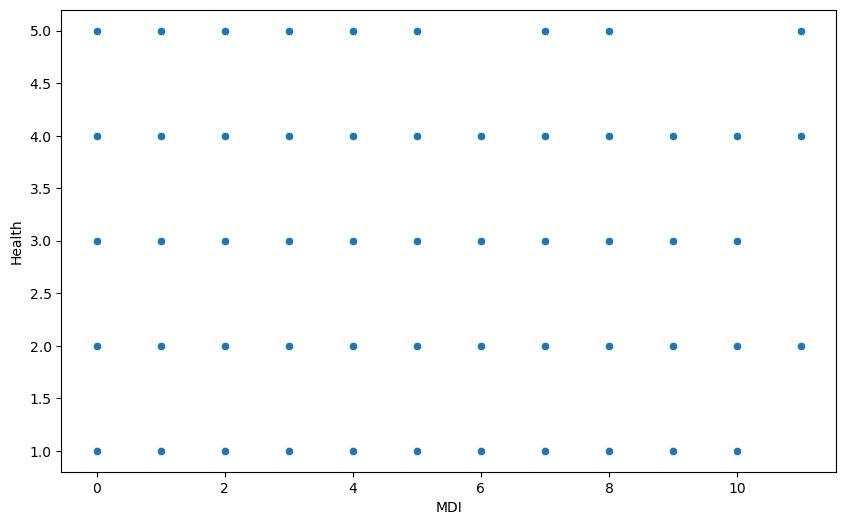

In [27]:
# multi depriviation index
df['MDI'] = df['HousingCostToIncomeGroup'] + df['HomeProbTotalGroup'] + df['NeighQualTotalGroup'] + df['TransportTimeGroup']
df['MDI'] = df['MDI'].astype(float)

# scatterplot for MDI with Health
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MDI', y='Health')
plt.show()


## Single Linear analysis

In [28]:
# perform ols regression for 'HousingCostToIncome' and 'Health' without constant
# using statsmodels.api

model = ols('Health ~ 0 + HousingCostToIncomeGroup', data=df).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.349
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              1485.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                   1.33e-260
Time:                        11:30:14   Log-Likelihood:                         -5728.1
No. Observations:                2776   AIC:                                  1.146e+04
Df Residuals:                    2775   BIC:                                  1.146e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [29]:
model = ols('Health ~ 0 + HomeProbTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              1992.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -5572.1
No. Observations:                2776   AIC:                                  1.115e+04
Df Residuals:                    2775   BIC:                                  1.115e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [30]:
model = ols('Health ~ 0 + NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              5970.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4729.9
No. Observations:                2776   AIC:                                      9462.
Df Residuals:                    2775   BIC:                                      9468.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [31]:
model = ols('Health ~ 0 + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.096
Model:                            OLS   Adj. R-squared (uncentered):              0.096
Method:                 Least Squares   F-statistic:                              295.0
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                    6.47e-63
Time:                        11:30:14   Log-Likelihood:                         -6182.8
No. Observations:                2776   AIC:                                  1.237e+04
Df Residuals:                    2775   BIC:                                  1.237e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

## Multiple linear regression

In [32]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.722
Model:                            OLS   Adj. R-squared (uncentered):              0.722
Method:                 Least Squares   F-statistic:                              1802.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4544.9
No. Observations:                2776   AIC:                                      9098.
Df Residuals:                    2772   BIC:                                      9121.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Interaction terms

In [33]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup + NeighQualTotalGroup + TransportTimeGroup + \
            HousingCostToIncomeGroup:HomeProbTotalGroup:NeighQualTotalGroup:TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.729
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              1491.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4510.4
No. Observations:                2776   AIC:                                      9031.
Df Residuals:                    2771   BIC:                                      9060.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                                                                         coef    std err          t     

#### HousingCostToIncomeGroup * HomeProbTotalGroup

In [34]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + HomeProbTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              1478.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -5316.1
No. Observations:                2776   AIC:                                  1.064e+04
Df Residuals:                    2774   BIC:                                  1.065e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [35]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup * HomeProbTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.584
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              1300.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -5104.5
No. Observations:                2776   AIC:                                  1.022e+04
Df Residuals:                    2773   BIC:                                  1.023e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

#### HousingCostToIncomeGroup * 'NeighQualTotalGroup'

In [36]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.707
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              3349.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4618.4
No. Observations:                2776   AIC:                                      9241.
Df Residuals:                    2774   BIC:                                      9253.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [37]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup * NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.752
Method:                 Least Squares   F-statistic:                              2800.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4388.7
No. Observations:                2776   AIC:                                      8783.
Df Residuals:                    2773   BIC:                                      8801.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------

#### HousingCostToIncomeGroup * 'TransportTimeGroup'

In [38]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.370
Model:                            OLS   Adj. R-squared (uncentered):              0.370
Method:                 Least Squares   F-statistic:                              816.1
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                   1.89e-279
Time:                        11:30:14   Log-Likelihood:                         -5680.8
No. Observations:                2776   AIC:                                  1.137e+04
Df Residuals:                    2774   BIC:                                  1.138e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [39]:
model = ols('Health ~ 0 + HousingCostToIncomeGroup * TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.392
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                              595.8
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                   7.48e-299
Time:                        11:30:14   Log-Likelihood:                         -5632.6
No. Observations:                2776   AIC:                                  1.127e+04
Df Residuals:                    2773   BIC:                                  1.129e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------

#### HomeProbTotalGroup * NeighQualTotalGroup

In [40]:
model = ols('Health ~ 0 + HomeProbTotalGroup + NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.705
Method:                 Least Squares   F-statistic:                              3326.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4625.3
No. Observations:                2776   AIC:                                      9255.
Df Residuals:                    2774   BIC:                                      9266.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [41]:
model = ols('Health ~ 0 + HomeProbTotalGroup * NeighQualTotalGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              2861.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4366.2
No. Observations:                2776   AIC:                                      8738.
Df Residuals:                    2773   BIC:                                      8756.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

#### HomeProbTotalGroup * TransportTimeGroup

In [42]:
model = ols('Health ~ 0 + HomeProbTotalGroup + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.436
Model:                            OLS   Adj. R-squared (uncentered):              0.435
Method:                 Least Squares   F-statistic:                              1070.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -5529.3
No. Observations:                2776   AIC:                                  1.106e+04
Df Residuals:                    2774   BIC:                                  1.107e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [43]:
model = ols('Health ~ 0 + HomeProbTotalGroup * TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.461
Model:                            OLS   Adj. R-squared (uncentered):              0.461
Method:                 Least Squares   F-statistic:                              792.1
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -5464.0
No. Observations:                2776   AIC:                                  1.093e+04
Df Residuals:                    2773   BIC:                                  1.095e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

#### NeighQualTotalGroup * TransportTimeGroup

In [44]:
model = ols('Health ~ 0 + NeighQualTotalGroup + TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.685
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              3017.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4719.3
No. Observations:                2776   AIC:                                      9443.
Df Residuals:                    2774   BIC:                                      9455.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [45]:
model = ols('Health ~ 0 + NeighQualTotalGroup * TransportTimeGroup', data=df).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Health   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.700
Method:                 Least Squares   F-statistic:                              2160.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        11:30:14   Log-Likelihood:                         -4650.3
No. Observations:                2776   AIC:                                      9307.
Df Residuals:                    2773   BIC:                                      9324.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

## Logistic Regression


In [46]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

df['Health'].fillna(df['Health'].median(), inplace=True) # 1个空值

# 定义并拟合多类别逻辑回归模型
multinomial_logit_model = sm.MNLogit(df['Health'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# 打印混淆矩阵
print(multinomial_logit_result.pred_table())    

# 计算准确率
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# 计算micro F1 和 macro F1
y_true = df['Health']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


Optimization terminated successfully.
         Current function value: 1.330550
         Iterations 8
[[ 119.  490.    0.   20.    0.]
 [ 125. 1128.    0.   27.    0.]
 [  49.  572.    0.   18.    0.]
 [  10.  183.    0.    2.    0.]
 [   2.   29.    0.    3.    0.]]
Accuracy: 0.44976593446164925
Micro F1: 0.1829312207418077
Macro F1: 0.062350229263912454


In [47]:
# transfer Health into binary value with median

df['Health_bin'] = df['Health'].apply(lambda x: 1 if x > df['Health'].median() else 0)

In [48]:
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import f1_score

# 定义并拟合多类别逻辑回归模型
multinomial_logit_model = sm.MNLogit(df['Health_bin'], df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']])
multinomial_logit_result = multinomial_logit_model.fit()

# 打印混淆矩阵
print(multinomial_logit_result.pred_table())    

# 计算准确率
accuracy = np.diag(multinomial_logit_result.pred_table()).sum() / df.shape[0]
print('Accuracy:', accuracy)

# 计算micro F1 和 macro F1
y_true = df['Health_bin']
y_pred = np.argmax(multinomial_logit_result.predict(), axis=1)
micro_f1 = f1_score(y_true, y_pred, average='micro')
macro_f1 = f1_score(y_true, y_pred, average='macro')
print('Micro F1:', micro_f1)
print('Macro F1:', macro_f1)


Optimization terminated successfully.
         Current function value: 0.647414
         Iterations 5
[[1821.   88.]
 [ 809.   59.]]
Accuracy: 0.6769895570759813
Micro F1: 0.6769895570759813
Macro F1: 0.4593177681766236


## Threshold analysis

In [49]:
# calculate the number of deprivations 
df['DeprivationNum'] = df[['HousingCostToIncomeGroup', 'HomeProbTotalGroup', 'NeighQualTotalGroup', 'TransportTimeGroup']].sum(axis=1)

In [50]:
# group the number of deprivations into 5 groups
df['DeprivationNumGroup'] = pd.cut(df['DeprivationNum'], bins=[-1, 2, 5, 100], labels=[0,1,2])
# df['DeprivationNumGroup'] = df['DeprivationNumGroup'].astype(float)
print(df['DeprivationNumGroup'].value_counts())

DeprivationNumGroup
1    1256
0    1156
2     365
Name: count, dtype: int64


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


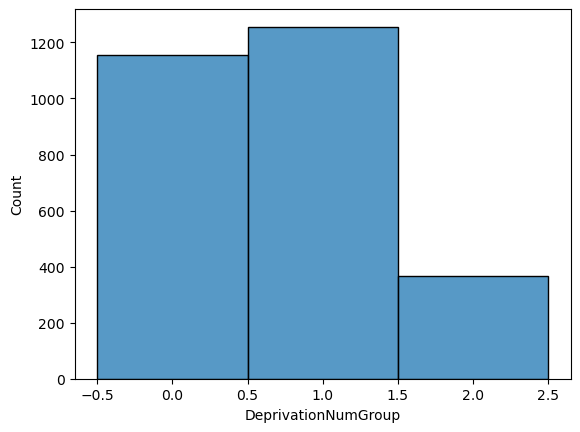

In [51]:
# plot for 'DeprivationNumGroup'
sns.histplot(df['DeprivationNumGroup'])
plt.show()

In [52]:
import scipy.stats as stats
from statsmodels.stats.anova import anova_lm
# compare health outcomes across these groups using ANOVA or Chi-square tests.
# ANOVA
model = ols('Health ~ DeprivationNumGroup', data=df).fit()
print(model.summary())
print()

                            OLS Regression Results                            
Dep. Variable:                 Health   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.820
Date:                Fri, 12 Jul 2024   Prob (F-statistic):            0.00111
Time:                        11:30:15   Log-Likelihood:                -3649.5
No. Observations:                2777   AIC:                             7305.
Df Residuals:                    2774   BIC:                             7323.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [58]:
# 进行ANOVA分析
anova_results = anova_lm(model)

# 输出结果
print(anova_results)

                         df       sum_sq   mean_sq        F   PR(>F)
DeprivationNumGroup     2.0    11.074095  5.537048  6.81996  0.00111
Residual             2774.0  2252.179056  0.811889      NaN      NaN


In [59]:
f_value, p_value = stats.f_oneway(df[df['DeprivationNumGroup']==0]['Health'], df[df['DeprivationNumGroup']==1]['Health'], df[df['DeprivationNumGroup']==2]['Health'])

print("F-value:", f_value)
print("P-value:", p_value)

F-value: 6.819959649709155
P-value: 0.0011101642053680792


In [55]:

# Chi-square tests
contingency_table = pd.crosstab(df['Health'], df['DeprivationNumGroup'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('P-value:', p)

Chi-square: 21.4502729005507
P-value: 0.006042782408567605
